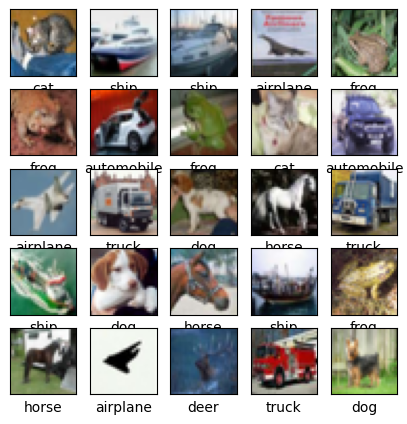

In [15]:
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_test[i][0]])
plt.show()

In [ ]:
# tf.keras.applications.ResNet50(
#     include_top=True,
#     weights='imagenet',
#     input_tensor=None,
#     input_shape=None,
#     pooling=None,
#     classes=1000,
#     classifier_activation='softmax'
# )

from tensorflow.keras.applications import ResNet50

resnet_model = ResNet50(
    include_top=True,
    weights='imagenet',
    input_shape=(224,224, 3),
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)

resnet_model.summary()


102967424/102967424 [==============================] - 5s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                    

In [ ]:
resnet_model.compile(loss='sparse_categorical_crossentropy' , optimizer='adam', metrics=['accuracy'])

import tensorflow as tf
for i in range(5):
  inputs = x_test[i]                 # Test_images의 i번째 이미지에 대한 평가
  inputs = tf.expand_dims(inputs, axis=0) # ResNet이 원하는 이미지 차원은 (None, 224, 224, 3)이므로 차원 하나를 더 추가해준다.
  x = tf.keras.layers.experimental.preprocessing.Resizing(224, 224)(inputs) # ResNet의 인풋사이즈에 맞춰준다. > 안맞춰도 돌아가지만 성능을 위해
  x = tf.keras.applications.resnet50.preprocess_input(x)  # 이전단계에서 안맞춰도 돌아가는 이유 > 바로 이 전처리 모듈이 있어서 알아서 맞춰주긴함
  resnet_model.evaluate(x, y_test[i])  # 모델의 성능을 파악해본다.

1/1 [==============================] - 0s 31ms/step - loss: 12.2392 - accuracy: 0.0000e+00


35363/35363 [==============================] - 0s 1us/step


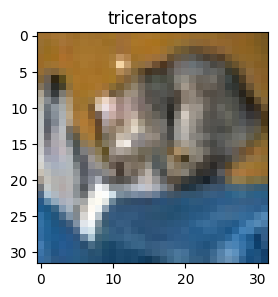

1/1 [==============================] - 0s 37ms/step


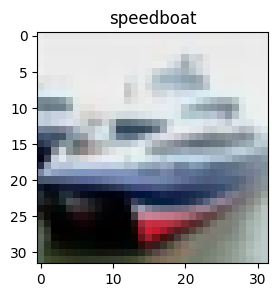

1/1 [==============================] - 0s 35ms/step


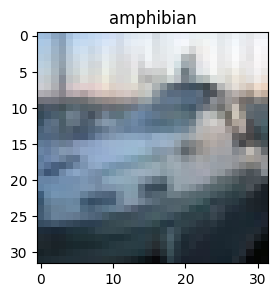

1/1 [==============================] - 0s 34ms/step


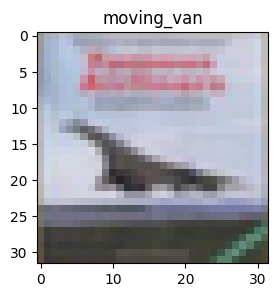

1/1 [==============================] - 0s 31ms/step


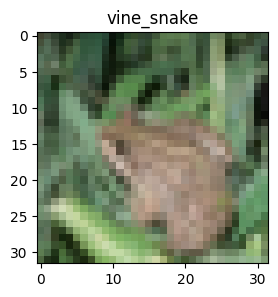

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import decode_predictions

for i in range(5):

  inputs = x_test[i]
  inputs = tf.expand_dims(inputs, axis=0)
  x = tf.keras.layers.experimental.preprocessing.Resizing(224, 224)(inputs)
  x = tf.keras.applications.resnet50.preprocess_input(x)

  preds = resnet_model.predict(x)  # ResNet Model의 예측진행

  # 예측 실행
  fig= plt.figure(figsize=(3,3))
  plt.title()# 타이틀에 예측 명 1순위를 넣는다.
  plt.imshow(x_test[i])	# 이미지는
  plt.show()

#### **전이학습**

In [14]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Input , Flatten , Dense

resnet_model = ResNet50(
    include_top=False,
    weights='imagenet',
    input_shape=(32,32, 3),
    classifier_activation='softmax'
)

resnet_model.trainable = False

# label(target) 데이터를 수치화 해준다. -> 안해줘도 loss 방법을 (sparse)로하면 되긴한다.
input_y = tf.keras.utils.to_categorical(y_train, 10)
test_y = tf.keras.utils.to_categorical(y_test, 10)

# 모델 layer 설계
inputs = Input(shape=(32,32,3))
x = tf.keras.layers.experimental.preprocessing.Resizing(32, 32)(inputs)
x = tf.keras.applications.resnet50.preprocess_input(inputs)
x = resnet_model(x, training = False)
x = Flatten()(x)								# Fully Connected에 온전하게 학습을 위해 펼쳐준다
outputs = Dense(10, activation = 'softmax')(x)	# Softmax 함수로 10개 분류하는 분류기
model_res = tf.keras.Model(inputs, outputs)	# model_res 란 이름의 인풋과 아웃풋이 정해진 모델 생성



In [26]:
# 모델 컴파일 진행 - 아까와 달리 categorical_crossentropy 사용 > label이 숫자형 데이터이므로
model_res.compile(optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001),
                  loss = 'categorical_crossentropy',
                  metrics=['accuracy'])

# early stopping 설정
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# 모델 fitting
histoty = model_res.fit(x_train, input_y, epochs = 10, validation_data=(x_test, test_y), batch_size= 256, callbacks=[early])

Epoch 1/10
196/196 [==============================] - 2s 8ms/step - loss: 37.2897 - accuracy: 0.2511 - val_loss: 26.2624 - val_accuracy: 0.2539
Epoch 2/10
196/196 [==============================] - 1s 4ms/step - loss: 23.8356 - accuracy: 0.2689 - val_loss: 21.9590 - val_accuracy: 0.2647
Epoch 3/10
196/196 [==============================] - 1s 4ms/step - loss: 20.4956 - accuracy: 0.2759 - val_loss: 21.4125 - val_accuracy: 0.2709
Epoch 4/10
196/196 [==============================] - 1s 3ms/step - loss: 18.4517 - accuracy: 0.2810 - val_loss: 20.4320 - val_accuracy: 0.2459
Epoch 5/10
196/196 [==============================] - 1s 4ms/step - loss: 18.2154 - accuracy: 0.2837 - val_loss: 20.1499 - val_accuracy: 0.2772
Epoch 6/10
196/196 [==============================] - 1s 4ms/step - loss: 17.0135 - accuracy: 0.2844 - val_loss: 17.2394 - val_accuracy: 0.2613
Epoch 7/10
196/196 [==============================] - 1s 4ms/step - loss: 16.5296 - accuracy: 0.2854 - val_loss: 15.1818 - val_accuracy:

1/1 [==============================] - 0s 78ms/step


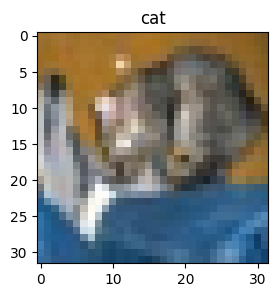

1/1 [==============================] - 0s 40ms/step


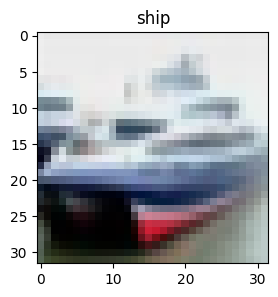

1/1 [==============================] - 0s 37ms/step


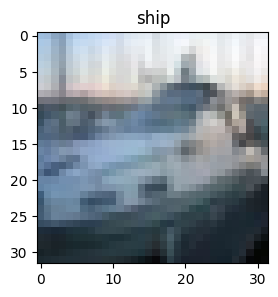

1/1 [==============================] - 0s 23ms/step


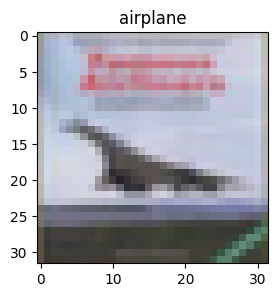

1/1 [==============================] - 0s 25ms/step


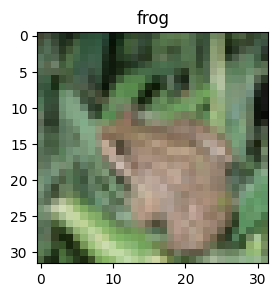

In [22]:
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import decode_predictions
title = ['cat', 'ship', 'ship', 'airplane' , 'frog']
# class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
#                'dog', 'frog', 'horse', 'ship', 'truck']
for i in range(5):

  inputs = x_test[i]
  inputs = tf.expand_dims(inputs, axis=0)
  x = tf.keras.layers.experimental.preprocessing.Resizing(32, 32)(inputs)

  preds = model_res.predict(x)  # ResNet Model의 예측진행
  # print(preds)
  # 예측 실행
  fig= plt.figure(figsize=(3,3))
  # plt.title(decode_predictions(preds, top=1)[0][0][1])# 타이틀에 예측 명 1순위를 넣는다.
  plt.title(title[i])
  plt.imshow(x_test[i])	# 이미지는
  plt.show()

#### 전이학습과 fine_tunning

In [27]:
resnet_model.trainable = True		# resnet 모델 학습동결을 해제한다
for i in resnet_model.layers[:143]:	# 143층부터의 학습은 해제상태로 두고,
  i.trainable = False				# 이전까지의 학습은 동결한다.

for i in resnet_model.layers[140:]:	# 동결이 제대로 해제됐는지 약간 이전층부터 출력해본다.
  print(i.name, i.trainable)

# 모델 layer 설계
inputs = Input(shape=(32,32,3))
x = tf.keras.layers.experimental.preprocessing.Resizing(32, 32)(inputs)
x = tf.keras.applications.resnet50.preprocess_input(inputs)
# x = resnet_model(x, training = False)
x = Flatten()(x)								# Fully Connected에 온전하게 학습을 위해 펼쳐준다
outputs = Dense(10, activation = 'softmax')(x)	# Softmax 함수로 10개 분류하는 분류기
model_res = tf.keras.Model(inputs, outputs)	# model_res 란 이름의 인풋과 아웃풋이 정해진 모델 생성

model_res.compile(optimizer = tf.keras.optimizers.Adam( learning_rate= 0.0001),
                  loss = 'categorical_crossentropy',
                  metrics=['accuracy'])

early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)


save_fine = model_res.fit(x_train, input_y, epochs = 50, initial_epoch = histoty.epoch[-1],validation_data=(x_test, test_y), batch_size= 256, callbacks = [early])

conv4_block6_3_bn False
conv4_block6_add False
conv4_block6_out False
conv5_block1_1_conv True
conv5_block1_1_bn True
conv5_block1_1_relu True
conv5_block1_2_conv True
conv5_block1_2_bn True
conv5_block1_2_relu True
conv5_block1_0_conv True
conv5_block1_3_conv True
conv5_block1_0_bn True
conv5_block1_3_bn True
conv5_block1_add True
conv5_block1_out True
conv5_block2_1_conv True
conv5_block2_1_bn True
conv5_block2_1_relu True
conv5_block2_2_conv True
conv5_block2_2_bn True
conv5_block2_2_relu True
conv5_block2_3_conv True
conv5_block2_3_bn True
conv5_block2_add True
conv5_block2_out True
conv5_block3_1_conv True
conv5_block3_1_bn True
conv5_block3_1_relu True
conv5_block3_2_conv True
conv5_block3_2_bn True
conv5_block3_2_relu True
conv5_block3_3_conv True
conv5_block3_3_bn True
conv5_block3_add True
conv5_block3_out True
Epoch 10/50
196/196 [==============================] - 2s 5ms/step - loss: 55.2802 - accuracy: 0.1966 - val_loss: 35.8094 - val_accuracy: 0.2399
Epoch 11/50
196/196 [==